In [ ]:
import csv

dictio={}

from google.colab import drive
drive.mount('/content/drive')


with open('/content/drive/MyDrive/223B/dataset.csv', newline='') as csvfile:
    sreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in sreader:
        tilename = row[0].split(",")[1]
        cancer = row[0].split(",")[2]
        if cancer=="1" or cancer=="0":
            dictio[tilename]=int(cancer)  




Mounted at /content/drive


In [ ]:
import csv

dictio2={}

from google.colab import drive
drive.mount('/content/drive')


with open('/content/drive/MyDrive/223B/path_256_1_new/data/dataset.csv', newline='') as csvfile:
    sreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in sreader:
        tilename = row[0].split(",")[1]
        cancer = row[0].split(",")[2]
        #print(cancer, tilename)
        if cancer=="0+0":
            dictio2[tilename]=int(0)
        else:
            dictio2[tilename]=int(1)  



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# clean up test data

test_pics = []
test_cancer =[]
from imutils import paths
from PIL import Image, ImageFile
# from io import BytesIO
import numpy as np


path_64_1_test = '/content/drive/MyDrive/223B/64_1_copy/64_1_test'
path_128_1_test = '/content/drive/MyDrive/223B/128_1/128_1_test'
path_256_1_test = '/content/drive/MyDrive/223B/256_1_separ/256_1_test'
path_512_test = '/content/drive/MyDrive/223B/512/512_test'

path_new = path_256_1_test
imagePathsNew = list(paths.list_images(path_new))


numbering = 0
for imagePath in imagePathsNew:
    # convert images to arrays
    pic = Image.open(imagePath)
    pix = np.array(pic)

    # add array_images to a list
    test_pics.append(np.asarray(pic))
    
    tilenm = imagePath.split("/")[-1][0:-4]
    test_cancer.append(dictio[tilenm])
    print(numbering, ": ", tilenm , "\n")
    numbering +=1
    

# convert pics list of arrays into a 4D array with or without normalization
# convert cancer into 1D array

x_test = np.array(test_pics) / 127.5 - 1.
#test_pics_wo_norm = np.array(test_pics) 

test_cancer = np.array(test_cancer)
test_cancer = test_cancer.reshape((200,1)) 

y_test = test_cancer

del test_pics

print(np.shape(x_test), np.shape(y_test), test_cancer[0])

unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))





0 :  4202_17920_19712 

1 :  2636_70784_34048 

2 :  7664_26880_36736 

3 :  3281_17920_29568 

4 :  2690_3584_21504 

5 :  987_47936_4480 

6 :  3079_79744_25088 

7 :  6320_50176_20608 

8 :  5301_85120_24192 

9 :  962_42560_5824 

10 :  3821_30464_11648 

11 :  4186_16128_25088 

12 :  848_4032_7616 

13 :  66_11648_33152 

14 :  8025_84224_34048 

15 :  7153_39424_20608 

16 :  151_42112_8960 

17 :  5281_12544_21504 

18 :  8035_22400_25088 

19 :  1002_2688_38528 

20 :  3255_82432_38528 

21 :  8545_33152_22400 

22 :  2279_78848_37632 

23 :  6210_14336_7168 

24 :  6736_76160_25088 

25 :  2118_4480_53760 

26 :  7014_43904_13440 

27 :  6820_16128_5376 

28 :  11236_79744_9856 

29 :  3395_76160_28672 

30 :  99_88704_21504 

31 :  8181_115584_6272 

32 :  1261_20608_34944 

33 :  7390_37632_52864 

34 :  5073_43008_13440 

35 :  14427_2688_7168 

36 :  6913_9856_21504 

37 :  13314_93184_17024 

38 :  15116_43904_15232 

39 :  2670_54656_15232 

40 :  3931_72576_12544 

41 

{0: 98, 1: 102}

In [ ]:
# clean up train+val data


training_pics = []
training_cancer =[]
from imutils import paths
from PIL import Image, ImageFile
# from io import BytesIO
import numpy as np



path_64_1_train = '/content/drive/MyDrive/223B/64_1_copy/64_1_train'
path_128_1_train = '/content/drive/MyDrive/223B/128_1/128_1_train'
path_256_1_train = '/content/drive/MyDrive/223B/256_1_separ/256_1_train'
path_512_train = '/content/drive/MyDrive/223B/512/512_train'

path_train = path_256_1_train
imagePathsNew = list(paths.list_images(path_train))


for imagePath in imagePathsNew:
    # convert images to arrays
    # print(imagePath)
    pic = Image.open(imagePath)
    pix = np.array(pic)

    # add array_images to a list
    training_pics.append(np.asarray(pic))
    
    tilenm = imagePath.split("/")[-1][0:-4]
    training_cancer.append(dictio[tilenm])



path_tiles_from_model = '/content/drive/MyDrive/223B/path_256_1_new/'
imagePaths_tiles_from_model = list(paths.list_images(path_tiles_from_model))

count = 0
for imagePath in imagePaths_tiles_from_model:
    count +=1
    # convert images to arrays
    # print(imagePath)
    pic = Image.open(imagePath)
    pix = np.array(pic)

    # add array_images to a list
    training_pics.append(np.asarray(pic))
    
    tilenm = imagePath.split("/")[-1][0:-4]
    training_cancer.append(dictio2[tilenm])
    if count>2000:
      break
    





# convert pics list of arrays into a 4D array with or without normalization
# convert cancer into 1D array

training_pics = np.array(training_pics) / 127.5 - 1.
#training_pics_wo_norm = np.array(training_pics) 

training_cancer = np.array(training_cancer)
training_cancer = training_cancer.reshape((-1,1)) 

print( np.shape(training_pics), np.shape(training_cancer), training_cancer[0] )



(2801, 256, 256, 3) (2801, 1) [0]


In [ ]:
#create validation

from __future__ import print_function
import tensorflow.keras
from tensorflow.keras.layers import Dense, Conv2D, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.layers import AveragePooling2D, Input, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import numpy as np
import os

# split into train test sets
x_train, x_val, y_train, y_val = train_test_split(training_pics, training_cancer, test_size=0.20,  random_state=1)
print(np.shape(x_train),np.shape(y_train) )
print(np.shape(x_val),np.shape(y_val) )

del training_pics

(2240, 256, 256, 3) (2240, 1)
(561, 256, 256, 3) (561, 1)


In [ ]:
def lr_schedule(epoch, lr_init):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """

  #  lr = 1e-3
  #  if epoch > 180:
  #    lr *= 0.5e-3
  #  elif epoch > 160:
  #    lr *= 1e-3
  #  elif epoch > 120:
  #    lr *= 1e-2
  #  elif epoch > 80:
  #    lr *= 1e-1




    lr =  lr_init                   
    # if epoch > 180:
    #     lr *= 0.5e-5
    # elif epoch > 40:
    #     lr *= 1e-4
    # elif epoch > 30:
    #     lr *= 1e-3
    # elif epoch > 20:
    #     lr *= 1e-2
    #print('Learning rate: ', lr)

    if epoch > 1800:
        lr *= 0.5e-3
    elif epoch > 800:
        lr *= 1e-4
    elif epoch > 500:
        lr *= 1e-3
    elif epoch > 40:
        lr *= 1e-3
    # #print('Learning rate: ', lr)
    return lr

In [ ]:
def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder

    # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)

    # Returns
        x (tensor): tensor as input to the next layer
    """
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x

In [ ]:
def resnet_v2(input_shape, depth, num_units, num_classes=2, droprate=0.33):
    """ResNet Version 2 Model builder [b]

    Stacks of (1 x 1)-(3 x 3)-(1 x 1) BN-ReLU-Conv2D or also known as
    bottleneck layer
    First shortcut connection per layer is 1 x 1 Conv2D.
    Second and onwards shortcut connection is identity.
    At the beginning of each stage, the feature map size is 
    halved (downsampled) by a convolutional layer with 
    strides=2, while the number of filter maps is
    doubled. Within each stage, the layers have the same
    number filters and the same filter map sizes.
    Features maps sizes:
    conv1  : 32x32,  16
    stage 0: 32x32,  64
    stage 1: 16x16, 128
    stage 2:  8x8,  256

    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)

    # Returns
        model (Model): Keras model instance
    """


    if (depth - 2) % 9 != 0:
        raise ValueError('depth should be 9n+2 (eg 56 or 110 in [b])')
    # Start model definition.
    num_filters_in = 16
    num_res_blocks = int((depth - 2) / 9)

    inputs = Input(shape=input_shape)
    # v2 performs Conv2D with BN-ReLU on input before splitting into 2 paths
    x = resnet_layer(inputs=inputs,
                     num_filters=num_filters_in,
                     conv_first=True)
    
    c1 = x

    # Instantiate the stack of residual units
    for stage in range(3):
        for res_block in range(num_res_blocks):
            activation = 'relu'
            batch_normalization = True
            strides = 1
            if stage == 0:
                num_filters_out = num_filters_in * 4
                if res_block == 0:  # first layer and first stage
                    activation = None
                    batch_normalization = False
            else:
                num_filters_out = num_filters_in * 2
                if res_block == 0:  # first layer but not first stage
                    strides = 2    # downsample

            # bottleneck residual unit
            y = resnet_layer(inputs=x,
                             num_filters=num_filters_in,
                             kernel_size=1,
                             strides=strides,
                             activation=activation,
                             batch_normalization=batch_normalization,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_in,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_out,
                             kernel_size=1,
                             conv_first=False)
            if res_block == 0:
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters_out,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = tensorflow.keras.layers.add([x, y])

        num_filters_in = num_filters_out

    # Add classifier on top.
    # v2 has BN-ReLU before Pooling
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    z = Dense(num_units,
              activation='relu',
              kernel_initializer='he_normal')(y)

    z = Dropout(droprate)(z)
    z = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(z)
    outputs = z


    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
#subtract mean and to_categorical

# Input image dimensions.
input_shape = x_train.shape[1:]

# Normalize data.
x_train = x_train.astype('float32')
print("before: ", np.shape(x_train) , np.shape(y_train), np.shape(x_val),  np.shape(y_val), np.shape(x_test),  np.shape(y_test)  )
x_val = x_val.astype('float32') 

x_test = x_test.astype('float32') 

NUM_CLASSES = np.unique(y_train).shape[0] # 2
SUBTRACT_PIXEL_MEAN = True

# If subtract pixel mean is enabled
if SUBTRACT_PIXEL_MEAN:
    x_train_mean = np.mean(x_train, axis=0)
    x_train -= x_train_mean
    x_test -= x_train_mean
    x_val = x_val - x_train_mean


print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

# Convert class vectors to binary class matrices.
y_train = tensorflow.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_val = tensorflow.keras.utils.to_categorical(y_val, NUM_CLASSES)
y_test = tensorflow.keras.utils.to_categorical(y_test, NUM_CLASSES)




before:  (2240, 256, 256, 3) (2240, 1) (561, 256, 256, 3) (561, 1) (200, 256, 256, 3) (200, 1)
x_train shape: (2240, 256, 256, 3)
2240 train samples
200 test samples
y_train shape: (2240, 1)


In [ ]:
import time
import math
import matplotlib.pyplot as plt
from tensorflow import keras

def evaluate_network( BATCH_SIZE, EPOCHS, dropout, lr_initial):

  # full_evaluate_network has x_tr, y_tr, x_te, y_te, as input 

  x_tr = x_train
  y_tr = y_train
  x_te = x_val
  y_te = y_val

  USE_AUGMENTATION = True
  NUM_CLASSES = np.unique(y_tr).shape[0] # 10
  COLORS = x_tr.shape[3]
  
  depth = (COLORS+3) * 9 + 2 # this depth is meant for resnet_v2
  num_units = 50
  model = resnet_v2(input_shape, depth, num_units, num_classes=2, droprate=dropout)
  model.compile(loss='categorical_crossentropy',
               optimizer=Adam(lr=lr_initial),
               metrics=['accuracy', 'AUC'])
  
  BATCH_SIZE = math.floor(BATCH_SIZE)
  EPOCHS = math.floor(EPOCHS)


  start_time = time.time()

  # Prepare callbacks for model saving and for learning rate adjustment.
  lr_scheduler = LearningRateScheduler(lr_schedule)



  lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

  callbacks = [lr_reducer, lr_scheduler]

  # Run training, with or without data augmentation.
  if not USE_AUGMENTATION:
    print('Not using data augmentation.')
    model.fit(x_tr, y_tr,
               batch_size=BATCH_SIZE,
                epochs=EPOCHS,
                validation_data=(x_te, y_te),
              shuffle=True,
              callbacks=callbacks)
  else:
    #print('Using real-time data augmentation.')  # **** uncomment?

    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation 
        # (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_tr)


    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_tr, y_tr, 
                        batch_size=BATCH_SIZE),
                        validation_data=(x_te, y_te),
                        epochs=EPOCHS, verbose=0, workers=1,
                        callbacks=callbacks, 
                        use_multiprocessing=False)


  # # summarize history for accuracy
  # plt.plot(history.history['accuracy'])
  # plt.plot(history.history['val_accuracy'])
  # plt.title('model accuracy')
  # plt.ylabel('accuracy')
  # plt.xlabel('epoch')
  # plt.legend(['train', 'val'], loc='upper left')
  # plt.show()
  # # summarize history for loss
  # plt.plot(history.history['loss'])
  # plt.plot(history.history['val_loss'])
  # plt.title('model loss')
  # plt.ylabel('loss')
  # plt.ylim([0,2])
  # plt.xlabel('epoch')
  # plt.legend(['train', 'val'], loc='upper left')
  # plt.show()
  # # summarize history for loss
  # plt.plot(history.history['loss'])
  # plt.plot(history.history['val_loss'])
  # plt.title('model loss')
  # plt.ylabel('loss')
  # plt.xlabel('epoch')
  # plt.legend(['train', 'val'], loc='upper left')
  # plt.show()



  # print(np.shape(x_tr), np.shape(x_te), BATCH_SIZE, EPOCHS)
  # elapsed_time = time.time() - start_time
  # print("Elapsed time: {}".format(hms_string(elapsed_time)))
  # scores = model.evaluate(x_te, y_te, verbose=0)
  # print('Test loss:', scores[0])
  # print('Test accuracy:', scores[1])
  # #print('\n','\n')



  #print(history.history['val_accuracy'])

  #print(np.shape(x_te), np.shape(y_te))



  scores = model.evaluate(x_te, y_te, return_dict=False, verbose=0)
  print(scores)
  tensorflow.keras.backend.clear_session()
  return (scores[1])
  #return (- scores[0])

In [ ]:
import time
import math
import matplotlib.pyplot as plt
from tensorflow import keras

def create_train_return_model( BATCH_SIZE, EPOCHS, dropout, lr_initial):

  # full_evaluate_network has x_tr, y_tr, x_te, y_te, as input 

  x_tr = x_train
  y_tr = y_train
  x_te = x_val
  y_te = y_val

  USE_AUGMENTATION = True
  NUM_CLASSES = np.unique(y_tr).shape[0] # 10
  COLORS = x_tr.shape[3]


  
  depth = (COLORS+3) * 9 + 2 # this depth is meant for resnet_v2
  num_units = 50
  model = resnet_v2(input_shape, depth, num_units, num_classes=2, droprate=dropout)
  model.compile(loss='categorical_crossentropy',
               optimizer=Adam(lr=lr_initial),
               metrics=['accuracy', 'AUC'])
  
  BATCH_SIZE = math.floor(BATCH_SIZE)
  EPOCHS = math.floor(EPOCHS)


  start_time = time.time()

  # Prepare callbacks for model saving and for learning rate adjustment.
  lr_scheduler = LearningRateScheduler(lr_schedule)



  lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)

  callbacks = [lr_reducer, lr_scheduler]

  # Run training, with or without data augmentation.
  if not USE_AUGMENTATION:
    print('Not using data augmentation.')
    model.fit(x_tr, y_tr,
               batch_size=BATCH_SIZE,
                epochs=EPOCHS,
                validation_data=(x_te, y_te),
              shuffle=True,
              callbacks=callbacks)
  else:
    #print('Using real-time data augmentation.')  # **** uncomment?

    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # epsilon for ZCA whitening
        zca_epsilon=1e-06,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # set range for random shear
        shear_range=0.,
        # set range for random zoom
        zoom_range=0.,
        # set range for random channel shifts
        channel_shift_range=0.,
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        # value used for fill_mode = "constant"
        cval=0.,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False,
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation 
        # (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_tr)


    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_tr, y_tr, 
                        batch_size=BATCH_SIZE),
                        validation_data=(x_te, y_te),
                        epochs=EPOCHS, verbose=1, workers=1,
                        callbacks=callbacks, 
                        use_multiprocessing=False)



  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.ylim([0,2])
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  

  scores = model.evaluate(x_te, y_te, return_dict=False, verbose=0)
  print(scores)
  tensorflow.keras.backend.clear_session()
  return (model, scores[0], scores[1])

In [ ]:
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization
import time

# Supress NaN warnings
import warnings
warnings.filterwarnings("ignore",category =UserWarning)

import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)

# Bounded region of parameter space
pbounds = {'dropout': (0.05, 0.3), 
            'BATCH_SIZE': (7, 12),
            'EPOCHS': (80, 80),
           'lr_initial': (1e-4, 1e-2)
           }



optimizer = BayesianOptimization(
    f=evaluate_network,
    pbounds=pbounds,
    verbose=2,  # verbose = 1 prints only when a maximum 
    # is observed, verbose = 0 is silent
    random_state=1,
)

start_time = time.time()
optimizer.maximize(init_points=5, n_iter=15,)
time_took = time.time() - start_time

print(time_took)
#print(f"Total runtime: {hms_string(time_took)}")
print(optimizer.max)

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp36-none-any.whl size=11685 sha256=907192b5279c9c49fd6975a13c4d51fee6d666cd562c3c43064abba3fb2656fa
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization
|   iter    |  target   | BATCH_... |  EPOCHS   |  dropout  | lr_ini... |
-------------------------------------------------------------------------
[0.4612526297569275, 0.8374999761581421]
|  1        |  0.8375   |  9.085    |  80.0     |  0.05003  |  0.003093 |
[0.506418764591217, 0.8187500238418579]
|  2        |  0.8188   |  7.734    |  80.0     |  0.09657  |  0.003521 |
[1.0066522359848022, 0.8187500238418579]
|  3        |  0.8188   |  8.984    |  80.0     |  0.1548   |  0.006884 |
[0.6419292688369751, 0.831250011920929]
|  4        |  0.8313   |  8.022    |  80.0     |  0.05685  |  0.006738 |
[0.4938718378543854, 0.831250011920929]
|  5        |  0.8313   |

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/35
320/320 [==============================] - 75s 161ms/step - loss: 2.0117 - accuracy: 0.6630 - auc: 0.7186 - val_loss: 1.1992 - val_accuracy: 0.8235 - val_auc: 0.9098
Epoch 2/35
320/320 [==============================] - 49s 154ms/step - loss: 1.1365 - accuracy: 0.8170 - auc: 0.8884 - val_loss: 0.8526 - val_accuracy: 0.8449 - val_auc: 0.9269
Epoch 3/35
320/320 [==============================] - 49s 154ms/step - loss: 0.8802 - accuracy: 0.8068 - auc: 0.8866 - val_loss: 0.8323 - val_accuracy: 0.8039 - val_auc: 0.8481
Epoch 4/35
320/320 [==============================] - 49s 154ms/step - loss: 0.7416 - accuracy: 0.7940 - auc: 0.8841 - val_loss: 0.7696 - val_accuracy: 0.6667 - val_auc: 0.8124
Epoch 5/35
320/320 [==============================] - 49s 154ms/step - loss: 0.6453 - accuracy: 0.8086 - auc: 0.8945 - val_loss: 0.5731 - val_accuracy: 0.8645 - val_auc: 0.9238
Epoch 6/35
320/320 [==============================] - 49s 154ms/step - loss: 0.5954 - accuracy: 0.8097 - auc: 0.893

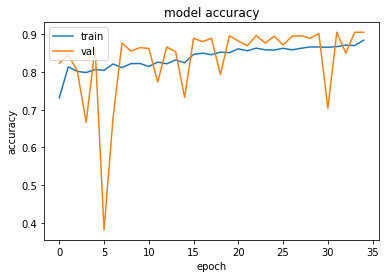

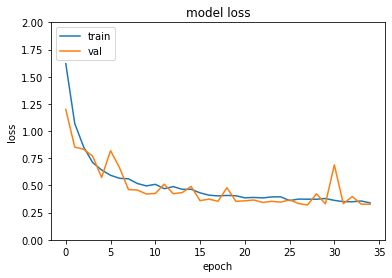

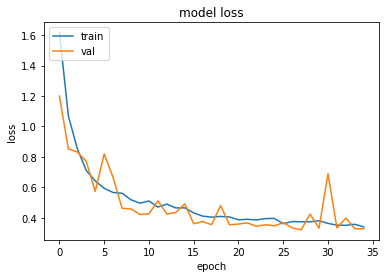

[0.3268224895000458, 0.9055258631706238, 0.9577404260635376]
7/7 [==============================] - 1s 163ms/step - loss: 0.6355 - accuracy: 0.7800 - auc: 0.8620
Test loss: 0.6354832649230957
Test accuracy: 0.7799999713897705


In [ ]:
BATCH_SIZE = 7
EPOCHS = 35
dropout = 0.05
lr_initial = 0.001

model_best, loss, accuracy = create_train_return_model( BATCH_SIZE, EPOCHS, dropout, lr_initial)
#evaluate_network( BATCH_SIZE, EPOCHS, dropout, lr_initial)

scores = model_best.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])




#model_best.summary()



In [ ]:
print(np.shape(x_test), np.shape(y_test))
scores = model_best.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])



wrong_ct = 0
wrong_list = []

for i in range(np.shape(y_test)[0]):
  x1 = x_test[i,:,:,:]
  y1 = y_test[i]
  x1 = x1.reshape( (1,256,256,3))
  if np.argmax(model_best.predict(x1)[0]) != np.argmax(y1):
    print(i, model_best.predict(x1)[0], np.argmax(model_best.predict(x1)[0]), np.argmax(y1) )
    #print(model_best.predict(x1)[0], y1 )
    #print(i)
    wrong_list.append(i)
    wrong_ct +=1
print(wrong_ct/200)
print(wrong_list)


(200, 256, 256, 3) (200, 2)
7/7 [==============================] - 1s 133ms/step - loss: 0.6355 - accuracy: 0.7800 - auc: 0.8620
Test loss: 0.6354832649230957
Test accuracy: 0.7799999713897705
2 [0.24696009 0.75303996] 1 0
7 [0.11211292 0.88788706] 1 0
9 [0.54061073 0.45938927] 0 1
13 [0.05925232 0.94074774] 1 0
21 [0.25044602 0.749554  ] 1 0
28 [0.15534985 0.8446501 ] 1 0
29 [9.316316e-05 9.999068e-01] 1 0
35 [0.04161225 0.95838773] 1 0
37 [0.22820814 0.7717919 ] 1 0
38 [0.07463402 0.9253659 ] 1 0
47 [0.06815623 0.9318438 ] 1 0
50 [0.1136829 0.8863171] 1 0
54 [0.40567818 0.5943218 ] 1 0
61 [0.21674645 0.78325355] 1 0
65 [0.12682477 0.8731752 ] 1 0
66 [0.2772802 0.7227197] 1 0
67 [0.05339581 0.94660425] 1 0
72 [0.00249998 0.9975    ] 1 0
75 [0.13020156 0.8697985 ] 1 0
76 [0.08584382 0.9141562 ] 1 0
90 [0.32808492 0.6719151 ] 1 0
101 [0.04785495 0.95214504] 1 0
106 [0.42034578 0.5796542 ] 1 0
114 [0.25345013 0.7465499 ] 1 0
124 [0.1740556  0.82594436] 1 0
133 [0.08624743 0.9137526 ] 1 0

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 16) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

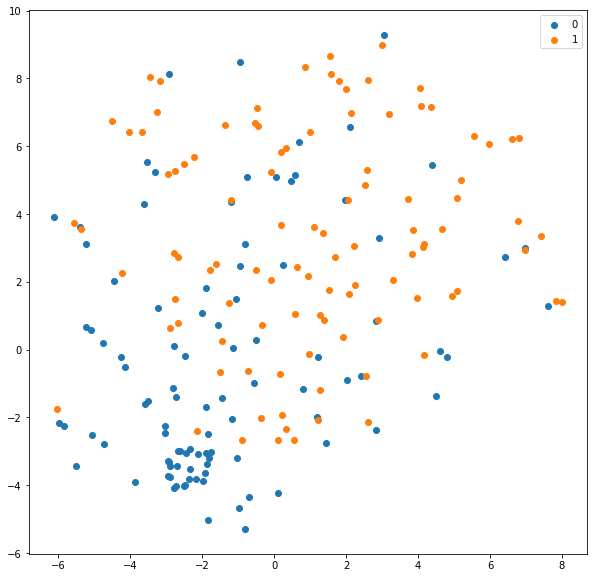

In [ ]:
from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

model_best.summary()

print(model_best.layers[183].name)

# redefine model to output right after the first hidden layer

feat_extr_model = Model(inputs=model_best.inputs, outputs=model_best.layers[183].output)
hidden_features = feat_extr_model.predict(x_test)
hidden_features = hidden_features.reshape( (200,-1)  )

print('shape of hidden_features is ', np.shape(hidden_features) )

pca = PCA(n_components=20)
pca_result = pca.fit_transform(hidden_features)
print('Variance PCA: {}'.format(np.sum(pca.explained_variance_ratio_)))

tsne = TSNE(n_components=2, verbose = 1)
tsne_results = tsne.fit_transform(pca_result)

color_map = np.argmax(y_test, axis=1)
plt.figure(figsize=(10,10))
for cl in range(2):
    indices = np.where(color_map==cl)
    indices = indices[0]
    plt.scatter(tsne_results[indices,0], tsne_results[indices, 1], label=cl)
plt.legend()
plt.show()


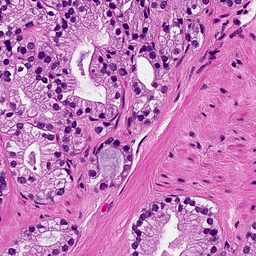

displayed
out of the relu   [[[[-0.8290422   2.770359    0.2981292  ...  0.6323552  -0.6631241
     3.385754  ]
   [-1.4233366   4.8623176   0.51967776 ...  1.1436554  -1.1384443
     5.9583983 ]
   [-2.4150443   8.173258    0.90289015 ...  1.9485639  -1.9334083
    10.024572  ]
   ...
   [-2.3783102   8.089106    0.88974273 ...  1.931649   -1.9027737
     9.92385   ]
   [-3.3538065  11.379589    1.2447145  ...  2.6985667  -2.6832452
    13.949149  ]
   [-2.320367    8.209747    0.862146   ...  2.0155373  -1.8560102
    10.105144  ]]

  [[-1.6499913   5.46663     0.60147506 ...  1.2521309  -1.3102723
     6.6938844 ]
   [-2.867894    9.737405    1.0460087  ...  2.272714   -2.2792318
    11.943024  ]
   [-4.3024154  14.519342    1.5983964  ...  3.4344687  -3.4202075
    17.835543  ]
   ...
   [-4.635262   15.629755    1.7238094  ...  3.6916404  -3.689444
    19.18565   ]
   [-6.467519   21.840986    2.3810186  ...  5.1224027  -5.1430206
    26.795408  ]
   [-4.5694175  16.188566    1.67

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:452: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:459: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/image.py:464: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


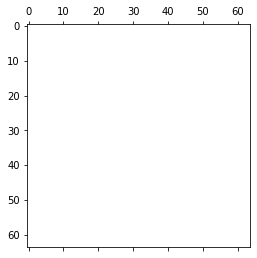

Displayed Heatmap


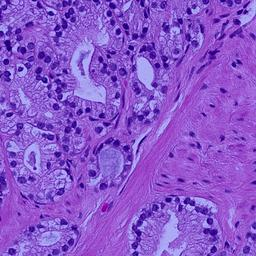

In [ ]:
# Display
import tensorflow as tf
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tensorflow import keras
from keras.applications.densenet import preprocess_input, decode_predictions


from imutils import paths
#from PIL import Image, ImageFile




#model_builder = keras.applications.xception.Xception      #(include_top=False,  input_shape=(256, 256, 3))
img_size = (256, 256)
#preprocess_input = keras.applications.xception.preprocess_input
#decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = 'activation_54'     #'conv5_block32_concat'      #"conv5_block32_2_conv"     'bn', 'relu',
#classifier_layer_names = ['avg_pool', 'flatten', 'dense_post_pool', 'predictions']

classifier_layer_names = [ 'average_pooling2d', 'flatten', 'dense', 'dropout', 'dense_1']




# # The local path to our target image
img_path = '/content/drive/MyDrive/223B/normal_256_1_new/4271_27776_23296.png'
# img_path = '/content/drive/MyDrive/223B/normal_256_1_new/189_4032_11648.png'
display(Image(img_path))
print('displayed')



# _45696_13440     4+5
# 2978  :  9063_84224_24192     4+5
# 2979  :  9063_9856_11648     4+5
# 2980  :  398_17024_24192     0+0
# 2981  :  398_85120_26880     0+0
# 2982  :  398_28672_14336     0+0
# 2983  :  398_5376_34944     0+0
# 2984  :  398_23296_16128     0+0
# 2985  :  398_86912_28672     0+0
# 2986  :  398_19712_18816     0+0
# 2987  :  398_17024_25984     0+0
# 2988  :  398_100352_10752     0+0
# 2989  :  398_29568_15232     0+0
# 2990  :  4271_89600_28672     3+3
# 2991  :  4271_90496_26880     3+3
# 2992  :  4271_31360_25984
# 2993  :  4271_30464_28672     3+3
# 2994  :  4271_89600_27776     3+3
# 2995  :  4271_26880_23296     3+3
# 2996  :  4271_27776_23296     3+3
# 2997  :  4271_89600_26880     3+3
# 2998  :  4271_91392_26880     3+3
# 2999  :  4271_31360_26880




















def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.preprocessing.image.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.preprocessing.image.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer
    last_conv_layer = model.get_layer(last_conv_layer_name)
    last_conv_layer_model = keras.Model(model.inputs, last_conv_layer.output)

    # Second, we create a model that maps the activations of the last conv
    # layer to the final class predictions
    classifier_input = keras.Input(shape=last_conv_layer.output.shape[1:])
    x = classifier_input
    for layer_name in classifier_layer_names:
        print(layer_name)
        x = model.get_layer(layer_name)(x)
    classifier_model = keras.Model(classifier_input, x)

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(img_array)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0)  / np.max(heatmap) 
    return heatmap





#######    select an image where the softmax error is very big   e.g. No91    '/content/drive/MyDrive/223B/256_1/256_1_test/5602_157696_32256.png'

img_path_select_image = img_path

# Prepare image
img_array = preprocess_input(get_img_array(img_path_select_image, size=img_size))

print('out of the relu  ', feat_extr_model.predict(img_array))





# Print what the top predicted class is
preds = model_best.predict(img_array)
#print("Predicted:", decode_predictions(preds, top=1)[0])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(
    img_array, model_best, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

print('Displayed Heatmap')






######### display the grad_cam

# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

# Save the superimposed image
save_path = "elephant_cam.jpg"
superimposed_img.save(save_path)

# Display Grad CAM
display(Image(save_path))



In [ ]:
# plot accuracy vs image size

size = [64, 128, 256]
accuracies_pl = [0.805, 0.880, 0.825]

plt.plot(size, accuracies_pl )
#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 4, 9, 16])
plt.xlabel("Time (s)")
plt.ylabel("Scale (Bananas)")